In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt 

# 1 Max Pooling
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

In [16]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
print(x.shape)
x = tf.reshape(x, [1, 3, 3, 1]) # menjadi 1 row dataset dan di flatten

print(x)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid')
# Poolsize adalah range dari tetangga jika maka tinggi jendela pencari max adalah 2x2
# dan strides adalah pergeseran sepanjang dimensi
max_pool_2d(x)


(3, 3)
tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

# 2 Filters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape untuk conv 2d= (28, 28, 3) dengan 4 data


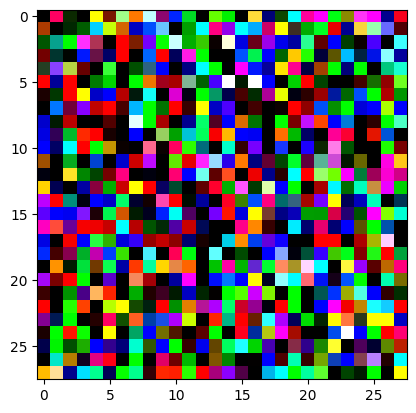

hasil filternya (4, 26, 26, 7) karena height-(kernelsize-1),width-(kernelsize-1), disebabkan corner tidak memiliki tetanga


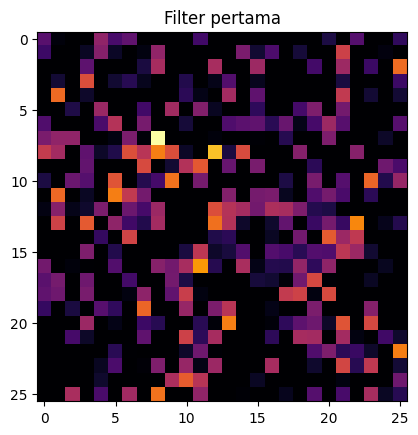

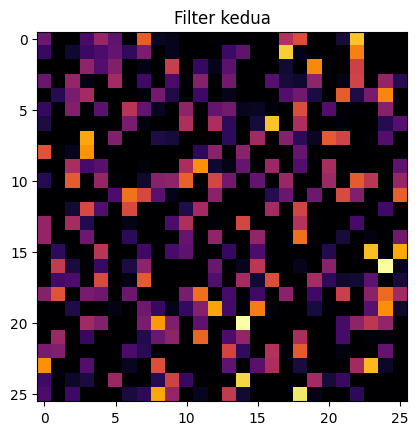

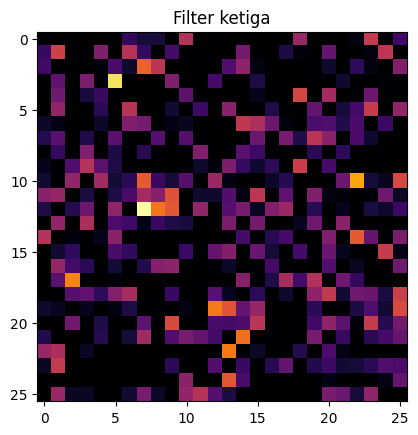

In [134]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
gambar_ke=3
input_shape = (4, 28, 28, 3)
print("Input shape untuk conv 2d=",input_shape[1:],"dengan 4 data")
x = tf.random.normal(input_shape)
plt.imshow(x[0,:,:])
plt.show()

y = tf.keras.layers.Conv2D(filters=7, kernel_size=3, activation=tf.nn.relu, input_shape=input_shape[1:])(x)
# Filters : banyak filter
# Kernels : lebar jendela filter
print("hasil filternya",y.shape,"karena height-(kernelsize-1),width-(kernelsize-1), disebabkan corner tidak memiliki tetanga")
plt.imshow(y[gambar_ke,:,:,0],cmap="inferno")
plt.title("Filter pertama")
plt.show()
plt.imshow(y[gambar_ke,:,:,1],cmap="inferno")
plt.title("Filter kedua")
plt.show()
plt.imshow(y[gambar_ke,:,:,6],cmap="inferno")
plt.title("Filter ketiga")
plt.show()



# 3) Shallow vs Convonsional NN

In [56]:
# Import data
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [57]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4956 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3782 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3386 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2981 - accuracy: 0.8888

MODEL EVALUATION:
313/313 [==============================] - 0s 806us/step - loss: 0.3621 - accuracy: 0.8689


In [58]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# 4) Visualizing the Convolutions and Pooling

In [59]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


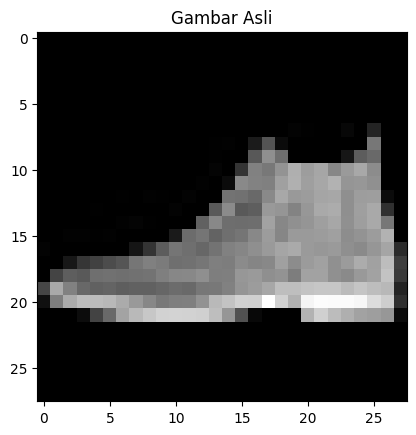

1/1 [==============================] - 0s 19ms/step


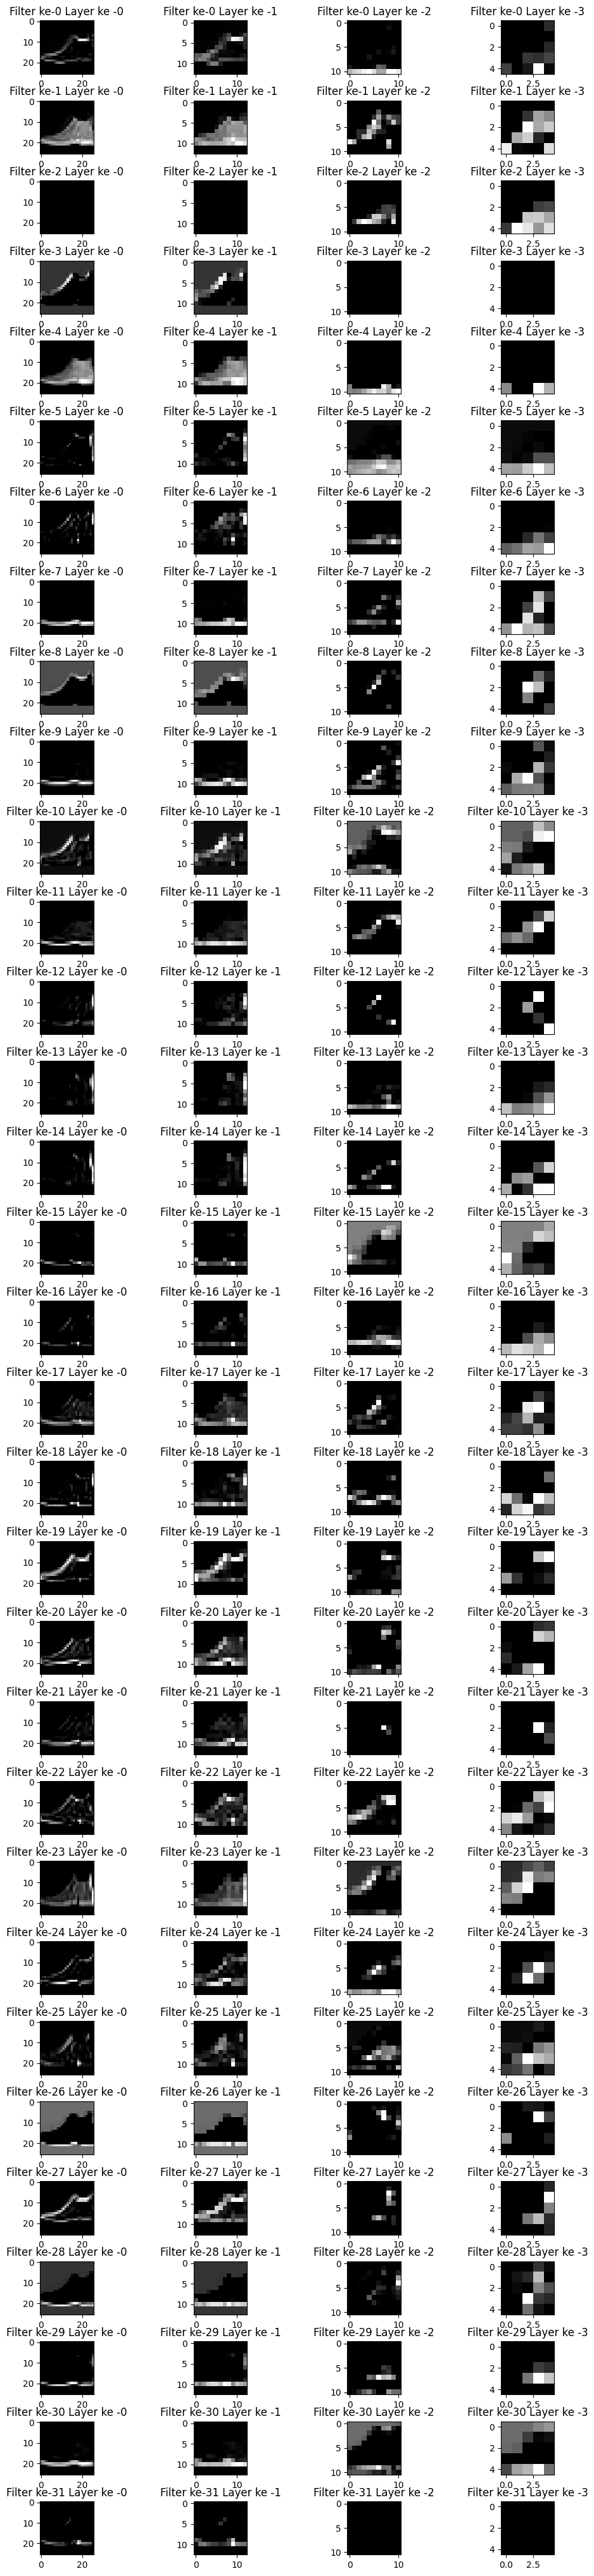

In [117]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

NUM_FILTERS=32
IMG_IDX=0
plt.imshow(test_images[IMG_IDX],cmap="gray")
plt.title("Gambar Asli")
plt.show()

f, axarr = plt.subplots(NUM_FILTERS,4,figsize=(12,NUM_FILTERS+20))
plt.subplots_adjust(hspace=0.5)
plt.title("Gambar Selama Proses")

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
img_perlayer=[activation_model.predict(test_images[IMG_IDX].reshape(1, 28, 28, 1))[x] for x in range(4)]
for filter in range(NUM_FILTERS):
    for idx,img in enumerate(img_perlayer):
      axarr[filter,idx].set_title("Filter ke-"+str(filter)+" Layer ke -"+str(idx))
      axarr[filter,idx].imshow(img[0, : , :, filter], cmap='gray')
      axarr[filter,idx].grid(False)
plt.show()


In [133]:
print('Layer')
for layers in model.layers:
    print(layers.input)
    print(layers)
    print(layers.output)
    print()

Layer
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_33_input'), name='conv2d_33_input', description="created by layer 'conv2d_33_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_33/Relu:0', description="created by layer 'conv2d_33'")

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_33/Relu:0', description="created by layer 'conv2d_33'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_9/MaxPool:0', description="created by layer 'max_pooling2d_9'")

KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_9/MaxPool:0', description="created by layer 'max_pooling2d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 32), dtype=tf.float32, name=None), name='conv2d_34/Relu:0', description="created by layer 'conv2d_34'

In [66]:
print(layer_outputs[1])

KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d_9/MaxPool:0', description="created by layer 'max_pooling2d_9'")
